In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [3]:
# Define file path
file_path = r"C:\Users\Olajide FemVrich\Desktop\Just DATA\archive\student-scores.csv"

df = pd.read_csv(file_path)

print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())

   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

In [4]:
df["full_name"] = df["first_name"] + " " + df["last_name"]

## The key objectives are:

- **Identify factors influencing academic performance** (e.g., study hours, absence days, extracurricular activities).

- **Compare performance across genders to detect any disparities**.

- **Analyze career aspirations in relation to subject strengths** (e.g., do aspiring doctors perform better in biology?).

- **Investigate the impact of part-time jobs and extracurricular activities on grades**.

- **Provide actionable recommendations for educators, policymakers, and students**.

# Academic Performance Analysis section

## 1. Distribution of Scores

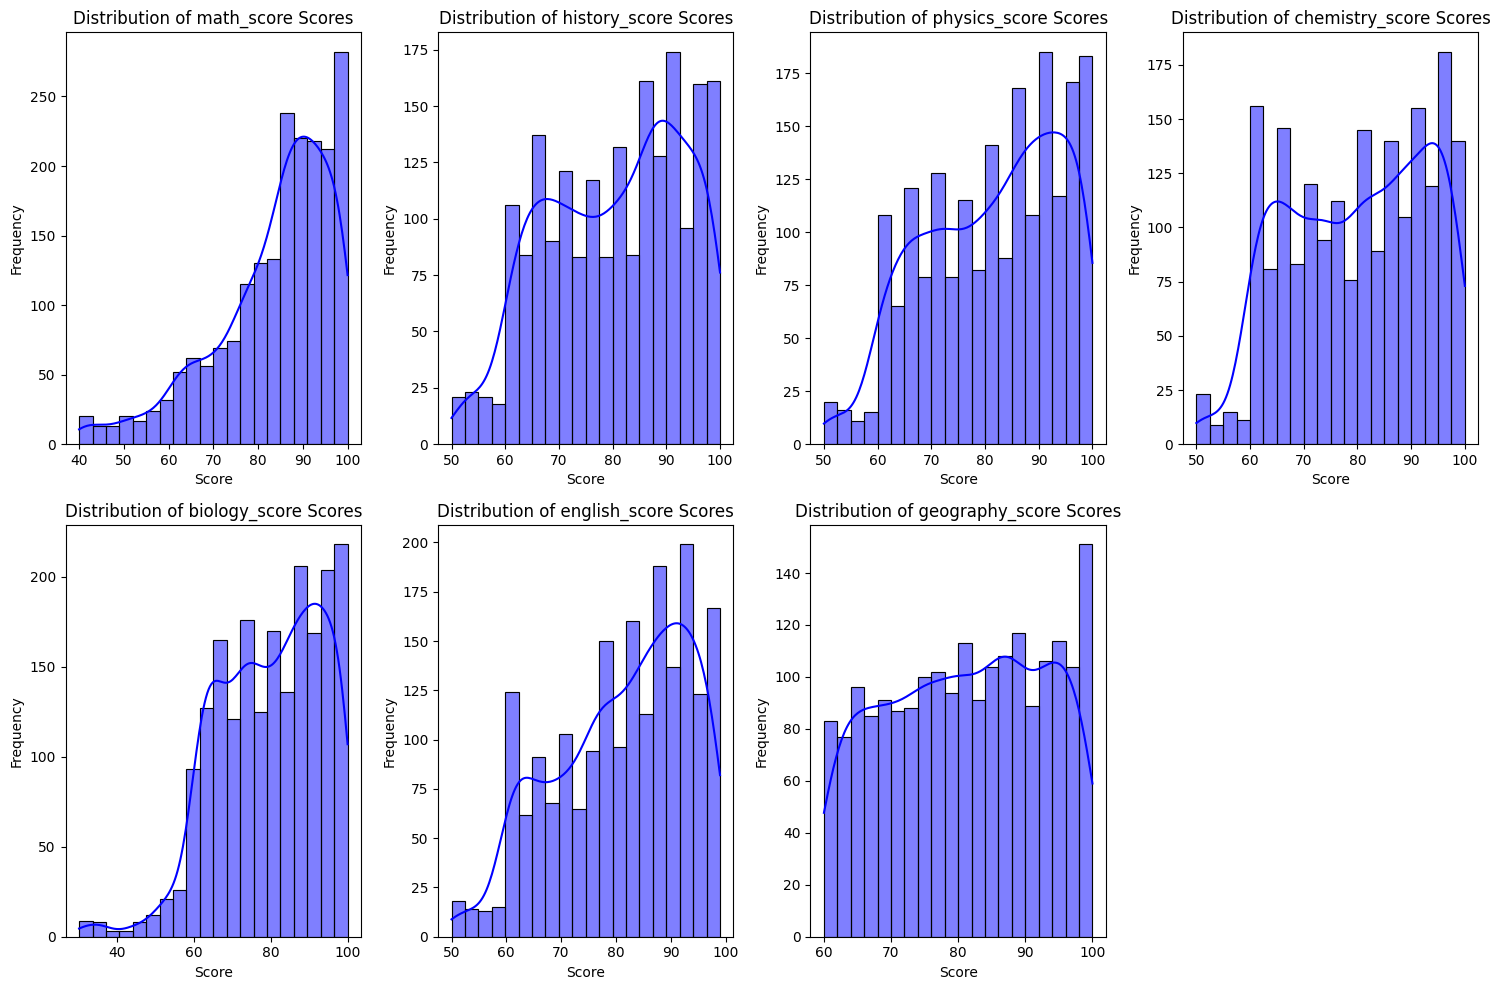

In [5]:
# List of subjects
subjects = ['math_score', 'history_score', 'physics_score','chemistry_score', 'biology_score', 'english_score', 'geography_score']

plt.figure(figsize=(15, 10))

# Adjust the grid size to 2 rows and 4 columns
for i, subject in enumerate(subjects, 1):
    plt.subplot(2, 4, i)  # Now using 2 rows and 4 columns
    sns.histplot(df[subject], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {subject} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Correlation Between Subjects

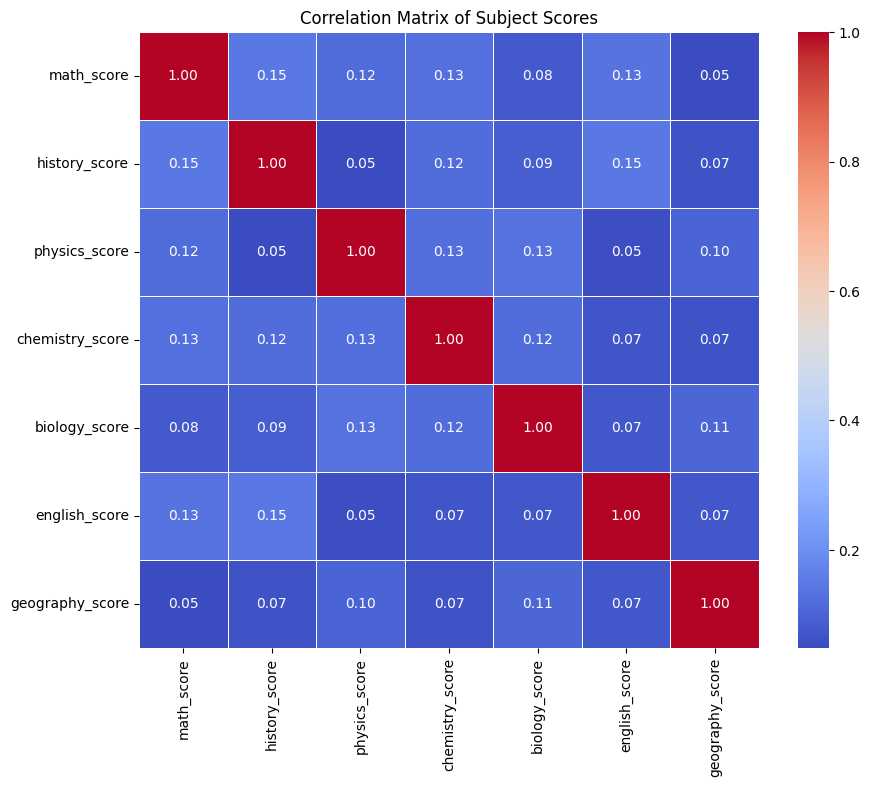

In [6]:
# Compute the correlation matrix
corr_matrix = df[subjects].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Subject Scores')
plt.show()

## 3. Top & Bottom Performers

In [7]:
# Calculate the overall score as the average of all subjects
df['Overall_Score'] = df[subjects].mean(axis=1)

# Top Performers (Top 5)
top_performers = df.nlargest(5, 'Overall_Score')

# Bottom Performers (Bottom 5)
bottom_performers = df.nsmallest(5, 'Overall_Score')

# Display top and bottom performers
print("Top Performers:")
print(top_performers[['full_name', 'Overall_Score']]) 

print("\nBottom Performers:")
print(bottom_performers[['full_name', 'Overall_Score']])  


Top Performers:
            full_name  Overall_Score
796     Lisa Mitchell      96.142857
779       Todd Howard      95.857143
1573  Paula Hernandez      95.857143
551      Paul Shaffer      95.714286
1419      Mary Arnold      95.714286

Bottom Performers:
             full_name  Overall_Score
1661      Thomas Scott      59.142857
1965  Jennifer Leblanc      59.142857
906     Alicia Beltran      61.428571
527      Deborah Rojas      63.142857
819     Steven Alvarez      63.285714


## 4. Average Scores by Subject

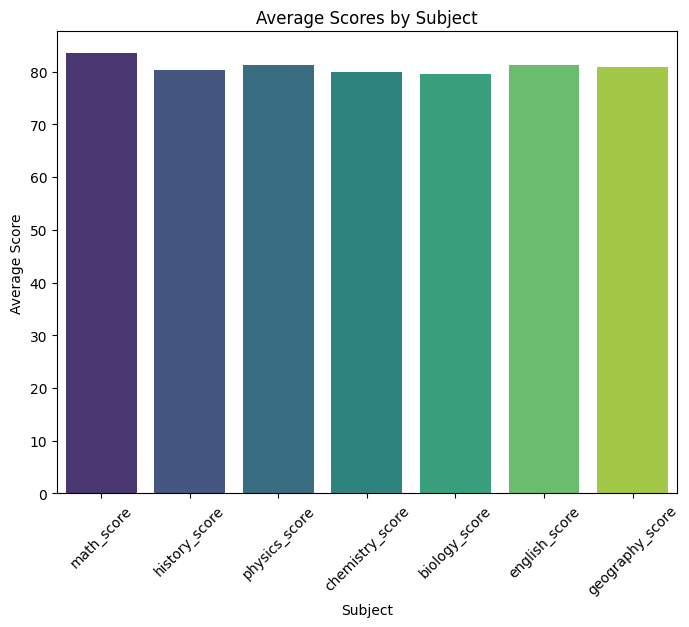

In [8]:
# Calculate average scores by subject
average_scores = df[subjects].mean()

# Plot the average scores
plt.figure(figsize=(8, 6))
sns.barplot(x=average_scores.index, y=average_scores.values, hue=average_scores.index, palette='viridis', legend=False)

plt.title('Average Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=45)  
plt.show()

## 5. Impact of study habits and attendance on performance.

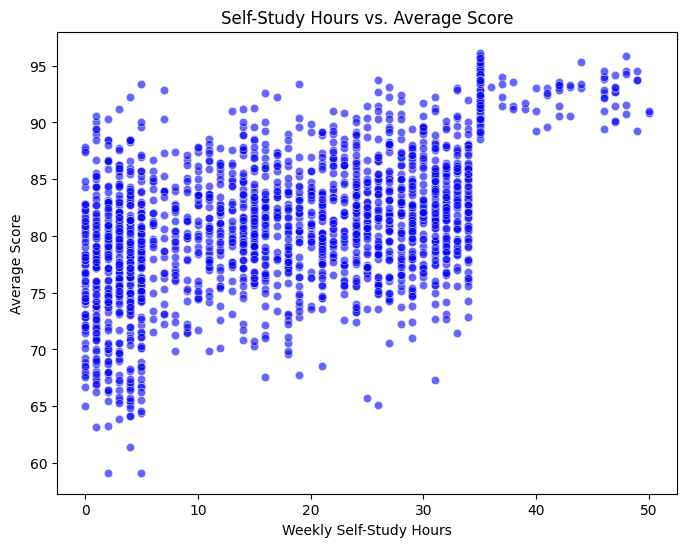

Correlation between Study Hours and Scores:
math_score         0.393569
history_score      0.276231
physics_score      0.202120
chemistry_score    0.201340
biology_score      0.190481
english_score      0.247796
geography_score    0.153622
Name: weekly_self_study_hours, dtype: float64


In [9]:
# Correlation between weekly self-study hours and subject scores
correlation = df[subjects + ['weekly_self_study_hours']].corr()['weekly_self_study_hours'].drop('weekly_self_study_hours')

# Scatter plot: Weekly Self-Study Hours vs. Average Score
df['average_score'] = df[subjects].mean(axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['weekly_self_study_hours'], y=df['average_score'], alpha=0.6, color='blue')
plt.title('Self-Study Hours vs. Average Score')
plt.xlabel('Weekly Self-Study Hours')
plt.ylabel('Average Score')
plt.show()

# Display correlation values
print("Correlation between Study Hours and Scores:")
print(correlation)


## 6. Absence Days vs. Performance

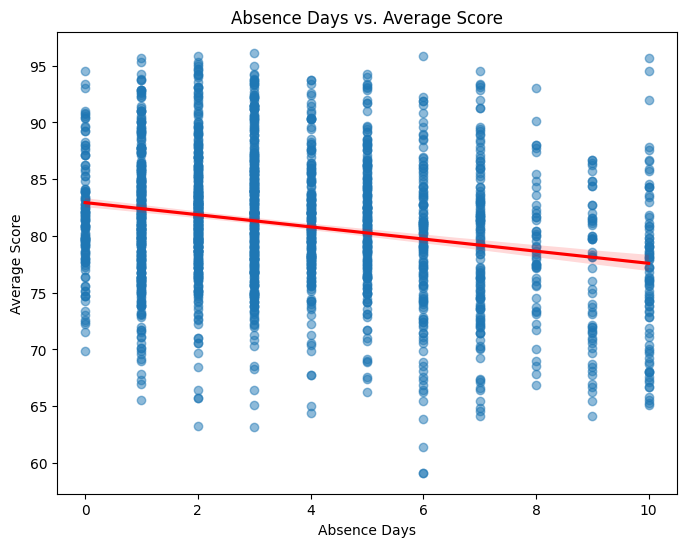

In [10]:
# Regression plot: Absence Days vs. Average Score
plt.figure(figsize=(8, 6))
sns.regplot(x=df['absence_days'], y=df['average_score'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Absence Days vs. Average Score')
plt.xlabel('Absence Days')
plt.ylabel('Average Score')
plt.show()

## 7. Part-Time Job Impact

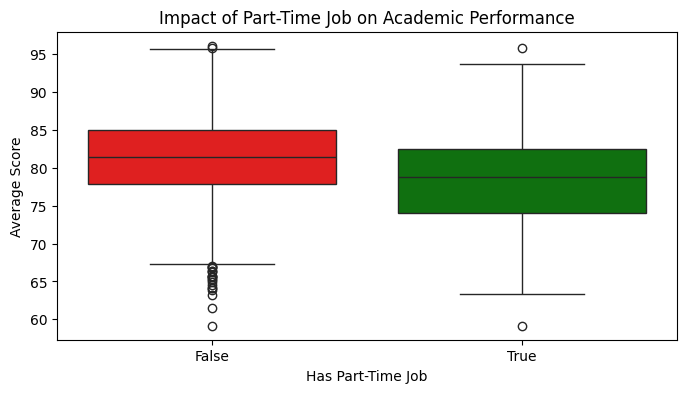

T-test Results:
T-Statistic: -8.07, P-Value: 0.0000
There is a statistically significant difference in scores between students with and without jobs.


In [11]:
# Convert 'part_time_job' column to categorical (assuming values like 'Yes'/'No')
df['part_time_job'] = df['part_time_job'].astype(str)

# Boxplot: Part-Time Job vs. Scores
plt.figure(figsize=(8, 4))
sns.boxplot(x='part_time_job', y='average_score', data=df, 
            palette=['red', 'green'], hue='part_time_job', legend=False)
plt.title('Impact of Part-Time Job on Academic Performance')
plt.xlabel('Has Part-Time Job')
plt.ylabel('Average Score')
plt.show()

# Compare means using a statistical test (t-test)
from scipy.stats import ttest_ind

job_students = df[df['part_time_job'] == 'True']['average_score']
no_job_students = df[df['part_time_job'] == 'False']['average_score']

t_stat, p_value = ttest_ind(job_students, no_job_students, equal_var=False)

print(f"T-test Results:\nT-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference in scores between students with and without jobs.")
else:
    print("No significant difference in scores between students with and without jobs.")

# 2. Gender-Based Performance Trends

## 1. Performance in STEM vs. Humanities

<Figure size 1000x400 with 0 Axes>

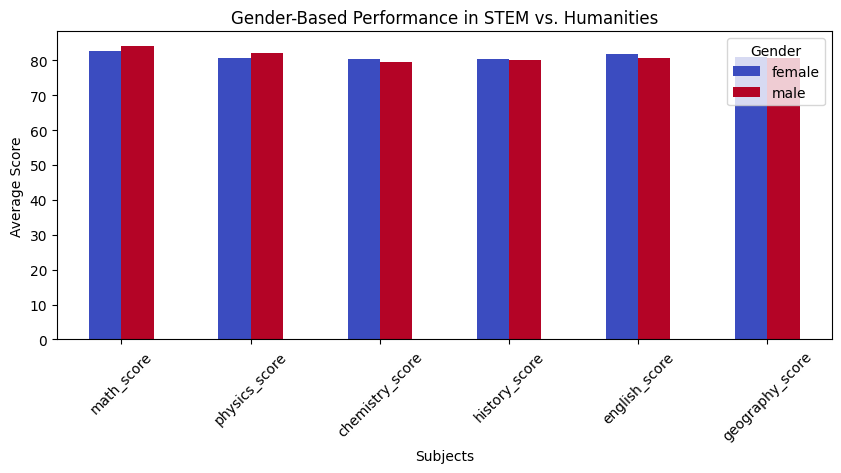

Average Scores by Gender in STEM and Humanities:
        math_score  physics_score  chemistry_score  history_score  \
gender                                                              
female   82.792415      80.678643        80.382236      80.495010   
male     84.114228      81.996994        79.606212      80.168337   

        english_score  geography_score  
gender                                  
female      81.740519        80.953094  
male        80.812625        80.822645  


In [14]:
# Convert 'gender' column to categorical
df['gender'] = df['gender'].astype(str)

# Define STEM and Humanities subjects
stem_subjects = ['math_score', 'physics_score', 'chemistry_score']
humanities_subjects = ['history_score', 'english_score', 'geography_score']

# Calculate average scores by gender
gender_performance = df.groupby('gender')[stem_subjects + humanities_subjects].mean()

# Plot performance in STEM vs. Humanities by gender
plt.figure(figsize=(10, 4))
gender_performance.T.plot(kind='bar', figsize=(10, 4), colormap='coolwarm')
plt.title('Gender-Based Performance in STEM vs. Humanities')
plt.xlabel('Subjects')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


print("Average Scores by Gender in STEM and Humanities:")
print(gender_performance)


## 2. Career Aspirations by Gender

<Figure size 1200x400 with 0 Axes>

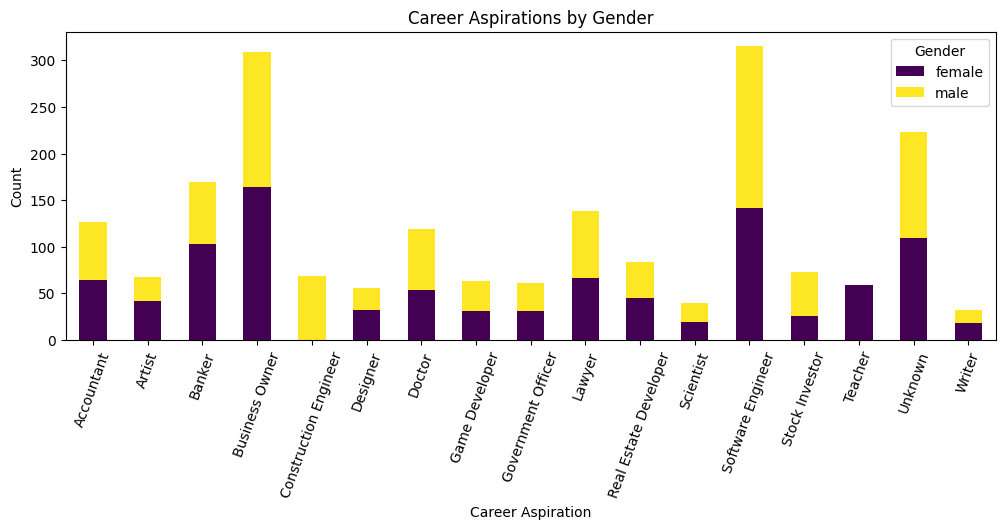

Career Aspirations Breakdown by Gender:
gender                 female   male
career_aspiration                   
Accountant               64.0   62.0
Artist                   42.0   25.0
Banker                  103.0   66.0
Business Owner          164.0  145.0
Construction Engineer     NaN   68.0
Designer                 32.0   24.0
Doctor                   53.0   66.0
Game Developer           31.0   32.0
Government Officer       31.0   30.0
Lawyer                   66.0   72.0
Real Estate Developer    45.0   38.0
Scientist                19.0   20.0
Software Engineer       141.0  174.0
Stock Investor           25.0   48.0
Teacher                  59.0    NaN
Unknown                 109.0  114.0
Writer                   18.0   14.0


In [16]:
# Count career aspirations by gender
career_by_gender = df.groupby(['career_aspiration', 'gender']).size().unstack()

# Plot career aspirations by gender
plt.figure(figsize=(12, 4))
career_by_gender.plot(kind='bar', stacked=True, figsize=(12, 4), colormap='viridis')
plt.title('Career Aspirations by Gender')
plt.xlabel('Career Aspiration')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.legend(title='Gender')
plt.show()

print("Career Aspirations Breakdown by Gender:")
print(career_by_gender)


# 3. Extracurricular Activities & Performance Analysis

<Figure size 1000x400 with 0 Axes>

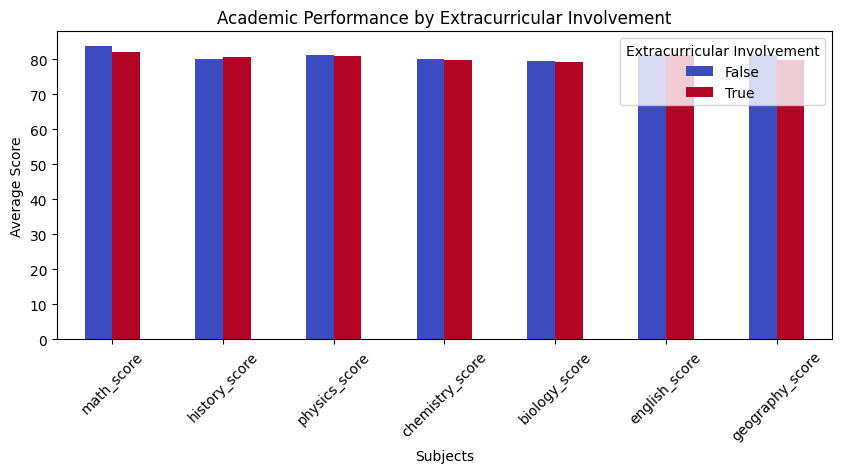

In [18]:
# Convert 'extracurricular_activities' to categorical
df['extracurricular_activities'] = df['extracurricular_activities'].astype(str)

# Calculate average scores for students with vs. without extracurricular activities
extra_perf = df.groupby('extracurricular_activities')[['math_score', 'history_score', 'physics_score', 
                                                         'chemistry_score', 'biology_score', 'english_score', 
                                                         'geography_score']].mean()

# Plot performance by extracurricular involvement
plt.figure(figsize=(10, 4))
extra_perf.T.plot(kind='bar', figsize=(10, 4), colormap='coolwarm')
plt.title('Academic Performance by Extracurricular Involvement')
plt.xlabel('Subjects')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Extracurricular Involvement')
plt.show()



# 4. Career Aspirations & Subject Strengths

In [19]:
print(df['career_aspiration'].unique())

['Lawyer' 'Doctor' 'Government Officer' 'Artist' 'Unknown'
 'Software Engineer' 'Teacher' 'Business Owner' 'Scientist' 'Banker'
 'Writer' 'Accountant' 'Designer' 'Construction Engineer' 'Game Developer'
 'Stock Investor' 'Real Estate Developer']


In [20]:
# Group by career aspiration and calculate the mean scores
career_subject_strengths = df.groupby('career_aspiration')[['math_score', 'physics_score', 'chemistry_score',
                                                             'biology_score', 'english_score', 'history_score']].mean()

# Sort each subject from highest to lowest score
career_subject_strengths_sorted = career_subject_strengths.sort_values(by=['math_score', 'physics_score', 
                                                                           'biology_score', 'chemistry_score', 
                                                                           'english_score', 'history_score'], ascending=False)

# Display the first few rows
print(career_subject_strengths_sorted.head())

                       math_score  physics_score  chemistry_score  \
career_aspiration                                                   
Software Engineer       92.146032      81.149206        79.844444   
Doctor                  92.025210      91.974790        91.747899   
Game Developer          89.952381      91.015873        78.746032   
Construction Engineer   89.720588      90.588235        78.617647   
Stock Investor          88.109589      80.013699        80.821918   

                       biology_score  english_score  history_score  
career_aspiration                                                   
Software Engineer          79.720635      80.866667      81.355556  
Doctor                     92.529412      85.176471      86.731092  
Game Developer             79.285714      79.301587      76.920635  
Construction Engineer      83.161765      81.058824      80.985294  
Stock Investor             81.013699      79.753425      80.356164  


## Step 2: Career-Subject Mismatch Analysis: Dis analysis was done with excel, but here is the dataframe creation

In [21]:

def analyze_career_alignment(df):
    """
    Analyze alignment between students' best subjects and their career aspirations.
    Returns a DataFrame with alignment analysis and saves results to CSV.
    """
    # STEP 1: Define mappings and constants
    STEM_CAREERS = {
        'Doctor', 'Engineer', 'Scientist', 'Software Engineer', 
        'Game Developer', 'Construction Engineer', 'Banker'
    }
    
    HUMANITIES_CAREERS = {
        'Lawyer', 'Artist', 'Writer', 'Teacher'
    }
    
    STEM_SUBJECTS = {'Math', 'Physics', 'Chemistry', 'Biology'}
    HUMANITIES_SUBJECTS = {'English', 'History', 'Geography'}
    
    SCORE_COLUMNS = [
        'math_score', 'physics_score', 'chemistry_score', 'biology_score',
        'history_score', 'english_score', 'geography_score'
    ]
    
    # STEP 2: Create best subject column
    df['best_subject'] = (df[SCORE_COLUMNS]
                          .idxmax(axis=1)
                          .str.replace('_score', '')
                          .str.capitalize())
    
    # STEP 3: Map career aspirations to fields
    df['intended_field'] = df['career_aspiration'].apply(
        lambda x: 'STEM' if x in STEM_CAREERS else 
                 ('Humanities' if x in HUMANITIES_CAREERS else 'Unknown')
    )
    
    # STEP 4: Determine alignment
    def check_alignment(row):
        if row['intended_field'] == 'Unknown':
            return 'Unknown'
        elif (row['intended_field'] == 'STEM' and 
              row['best_subject'] in STEM_SUBJECTS):
            return 'Match'
        elif (row['intended_field'] == 'Humanities' and 
              row['best_subject'] in HUMANITIES_SUBJECTS):
            return 'Match'
        return 'Mismatch'
    
    df['alignment'] = df.apply(check_alignment, axis=1)
    
    # STEP 5: Prepare output DataFrame
    output_columns = {
        'full_name': 'Full Name',
        'career_aspiration': 'Career Aspiration',
        'math_score': 'Math Score',
        'physics_score': 'Physics Score',
        'biology_score': 'Biology Score',
        'best_subject': 'Best Subject',
        'intended_field': 'Intended Field',
        'alignment': 'Alignment'
    }
    
    result_df = (df[list(output_columns.keys())]
                .rename(columns=output_columns))
    
    # Save and return results
    result_df.to_csv("career_alignment_analysis.csv", index=False)
    return result_df

# Example usage:
if __name__ == "__main__":
    
    result = analyze_career_alignment(df)
    print(result.head())

           Full Name   Career Aspiration  Math Score  Physics Score  \
0         Paul Casey              Lawyer          73             93   
1  Danielle Sandoval              Doctor          90             96   
2       Tina Andrews  Government Officer          81             95   
3         Tara Clark              Artist          71             88   
4     Anthony Campos             Unknown          84             65   

   Biology Score Best Subject Intended Field Alignment  
0             63    Chemistry     Humanities  Mismatch  
1             90    Chemistry           STEM     Match  
2             65      History        Unknown   Unknown  
3             89      Biology     Humanities  Mismatch  
4             80         Math        Unknown   Unknown  
